# Подготовка

In [1]:
!pip install -q pycaret
!pip install -q sweetviz

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-xgboost 0.1.11 requires xgboost<=0.90, but you have xgboost 1.2.1 which is incompatible.


In [2]:
import os

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from pycaret.datasets import get_data
from pycaret.classification import setup, compare_models, create_model, tune_model, plot_model, predict_model, calibrate_model, save_model

import sweetviz as sv

pd.set_option('max_columns', None)

In [3]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [4]:
df = pd.read_csv('../input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')

# EDA

In [5]:
my_report = sv.analyze(df)
my_report.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Split Data

In [6]:
y = df['DEATH_EVENT'].values
X = df.drop(['DEATH_EVENT'], axis=1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, shuffle=True, stratify=y, random_state=RANDOM_SEED)

# PyCaret

In [8]:
#
df_copy = df.copy()

In [9]:
# 
#n_cols = df_copy.shape[1]
#df_copy.columns = [str(i) for i in range(n_cols)]
# 
grid = setup(data=df_copy, target=df_copy.columns[-1], train_size=0.90, preprocess=True, html=False, silent=True, verbose=False, session_id=42)

In [10]:
# 
best = compare_models(sort='AUC', fold = 10, n_select=1)
print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8105,0.8425,0.6125,0.7552,0.6664,0.5379,0.5505,0.367


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8105,0.8425,0.6125,0.7552,0.6664,0.5379,0.5505,0.367
knn,K Neighbors Classifier,0.6504,0.4898,0.1917,0.3602,0.2355,0.0532,0.0557,0.079


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8105,0.8425,0.6125,0.7552,0.6664,0.5379,0.5505,0.367
nb,Naive Bayes,0.7957,0.8404,0.5153,0.7786,0.6072,0.4789,0.5050,0.013
knn,K Neighbors Classifier,0.6504,0.4898,0.1917,0.3602,0.2355,0.0532,0.0557,0.079


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8105,0.8425,0.6125,0.7552,0.6664,0.5379,0.5505,0.367
nb,Naive Bayes,0.7957,0.8404,0.5153,0.7786,0.6072,0.4789,0.5050,0.013
dt,Decision Tree Classifier,0.7695,0.7301,0.6222,0.6591,0.6246,0.4610,0.4727,0.014
knn,K Neighbors Classifier,0.6504,0.4898,0.1917,0.3602,0.2355,0.0532,0.0557,0.079


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8105,0.8425,0.6125,0.7552,0.6664,0.5379,0.5505,0.367
nb,Naive Bayes,0.7957,0.8404,0.5153,0.7786,0.6072,0.4789,0.5050,0.013
dt,Decision Tree Classifier,0.7695,0.7301,0.6222,0.6591,0.6246,0.4610,0.4727,0.014
knn,K Neighbors Classifier,0.6504,0.4898,0.1917,0.3602,0.2355,0.0532,0.0557,0.079
svm,SVM - Linear Kernel,0.6877,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.014


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8105,0.8425,0.6125,0.7552,0.6664,0.5379,0.5505,0.367
nb,Naive Bayes,0.7957,0.8404,0.5153,0.7786,0.6072,0.4789,0.5050,0.013
dt,Decision Tree Classifier,0.7695,0.7301,0.6222,0.6591,0.6246,0.4610,0.4727,0.014
knn,K Neighbors Classifier,0.6504,0.4898,0.1917,0.3602,0.2355,0.0532,0.0557,0.079
svm,SVM - Linear Kernel,0.6877,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.014
ridge,Ridge Classifier,0.8105,0.0000,0.6417,0.7214,0.6713,0.5401,0.5477,0.015


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8516,0.9104,0.7292,0.7991,0.7487,0.6453,0.6581,0.318
lr,Logistic Regression,0.8105,0.8425,0.6125,0.7552,0.6664,0.5379,0.5505,0.367
nb,Naive Bayes,0.7957,0.8404,0.5153,0.7786,0.6072,0.4789,0.5050,0.013
dt,Decision Tree Classifier,0.7695,0.7301,0.6222,0.6591,0.6246,0.4610,0.4727,0.014
knn,K Neighbors Classifier,0.6504,0.4898,0.1917,0.3602,0.2355,0.0532,0.0557,0.079
svm,SVM - Linear Kernel,0.6877,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.014
ridge,Ridge Classifier,0.8105,0.0000,0.6417,0.7214,0.6713,0.5401,0.5477,0.015


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8516,0.9104,0.7292,0.7991,0.7487,0.6453,0.6581,0.318
lr,Logistic Regression,0.8105,0.8425,0.6125,0.7552,0.6664,0.5379,0.5505,0.367
nb,Naive Bayes,0.7957,0.8404,0.5153,0.7786,0.6072,0.4789,0.5050,0.013
dt,Decision Tree Classifier,0.7695,0.7301,0.6222,0.6591,0.6246,0.4610,0.4727,0.014
qda,Quadratic Discriminant Analysis,0.6954,0.6603,0.1792,0.5233,0.2542,0.1296,0.1581,0.015
knn,K Neighbors Classifier,0.6504,0.4898,0.1917,0.3602,0.2355,0.0532,0.0557,0.079
svm,SVM - Linear Kernel,0.6877,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.014
ridge,Ridge Classifier,0.8105,0.0000,0.6417,0.7214,0.6713,0.5401,0.5477,0.015


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8516,0.9104,0.7292,0.7991,0.7487,0.6453,0.6581,0.318
ada,Ada Boost Classifier,0.8071,0.8550,0.6819,0.7317,0.6823,0.5474,0.5672,0.065
lr,Logistic Regression,0.8105,0.8425,0.6125,0.7552,0.6664,0.5379,0.5505,0.367
nb,Naive Bayes,0.7957,0.8404,0.5153,0.7786,0.6072,0.4789,0.5050,0.013
dt,Decision Tree Classifier,0.7695,0.7301,0.6222,0.6591,0.6246,0.4610,0.4727,0.014
qda,Quadratic Discriminant Analysis,0.6954,0.6603,0.1792,0.5233,0.2542,0.1296,0.1581,0.015
knn,K Neighbors Classifier,0.6504,0.4898,0.1917,0.3602,0.2355,0.0532,0.0557,0.079
svm,SVM - Linear Kernel,0.6877,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.014
ridge,Ridge Classifier,0.8105,0.0000,0.6417,0.7214,0.6713,0.5401,0.5477,0.015


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8516,0.9104,0.7292,0.7991,0.7487,0.6453,0.6581,0.318
gbc,Gradient Boosting Classifier,0.8363,0.9069,0.7167,0.7719,0.7261,0.6119,0.6263,0.061
ada,Ada Boost Classifier,0.8071,0.8550,0.6819,0.7317,0.6823,0.5474,0.5672,0.065
lr,Logistic Regression,0.8105,0.8425,0.6125,0.7552,0.6664,0.5379,0.5505,0.367
nb,Naive Bayes,0.7957,0.8404,0.5153,0.7786,0.6072,0.4789,0.5050,0.013
dt,Decision Tree Classifier,0.7695,0.7301,0.6222,0.6591,0.6246,0.4610,0.4727,0.014
qda,Quadratic Discriminant Analysis,0.6954,0.6603,0.1792,0.5233,0.2542,0.1296,0.1581,0.015
knn,K Neighbors Classifier,0.6504,0.4898,0.1917,0.3602,0.2355,0.0532,0.0557,0.079
svm,SVM - Linear Kernel,0.6877,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.014
ridge,Ridge Classifier,0.8105,0.0000,0.6417,0.7214,0.6713,0.5401,0.5477,0.015


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8516,0.9104,0.7292,0.7991,0.7487,0.6453,0.6581,0.318
gbc,Gradient Boosting Classifier,0.8363,0.9069,0.7167,0.7719,0.7261,0.6119,0.6263,0.061
lda,Linear Discriminant Analysis,0.8142,0.8825,0.6542,0.7295,0.6825,0.5525,0.5597,0.014
ada,Ada Boost Classifier,0.8071,0.8550,0.6819,0.7317,0.6823,0.5474,0.5672,0.065
lr,Logistic Regression,0.8105,0.8425,0.6125,0.7552,0.6664,0.5379,0.5505,0.367
nb,Naive Bayes,0.7957,0.8404,0.5153,0.7786,0.6072,0.4789,0.5050,0.013
dt,Decision Tree Classifier,0.7695,0.7301,0.6222,0.6591,0.6246,0.4610,0.4727,0.014
qda,Quadratic Discriminant Analysis,0.6954,0.6603,0.1792,0.5233,0.2542,0.1296,0.1581,0.015
knn,K Neighbors Classifier,0.6504,0.4898,0.1917,0.3602,0.2355,0.0532,0.0557,0.079
svm,SVM - Linear Kernel,0.6877,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.014


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8516,0.9104,0.7292,0.7991,0.7487,0.6453,0.6581,0.318
gbc,Gradient Boosting Classifier,0.8363,0.9069,0.7167,0.7719,0.7261,0.6119,0.6263,0.061
lda,Linear Discriminant Analysis,0.8142,0.8825,0.6542,0.7295,0.6825,0.5525,0.5597,0.014
et,Extra Trees Classifier,0.7996,0.8784,0.5514,0.7776,0.6317,0.5001,0.5234,0.285
ada,Ada Boost Classifier,0.8071,0.8550,0.6819,0.7317,0.6823,0.5474,0.5672,0.065
lr,Logistic Regression,0.8105,0.8425,0.6125,0.7552,0.6664,0.5379,0.5505,0.367
nb,Naive Bayes,0.7957,0.8404,0.5153,0.7786,0.6072,0.4789,0.5050,0.013
dt,Decision Tree Classifier,0.7695,0.7301,0.6222,0.6591,0.6246,0.4610,0.4727,0.014
qda,Quadratic Discriminant Analysis,0.6954,0.6603,0.1792,0.5233,0.2542,0.1296,0.1581,0.015
knn,K Neighbors Classifier,0.6504,0.4898,0.1917,0.3602,0.2355,0.0532,0.0557,0.079


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8516,0.9104,0.7292,0.7991,0.7487,0.6453,0.6581,0.318
gbc,Gradient Boosting Classifier,0.8363,0.9069,0.7167,0.7719,0.7261,0.6119,0.6263,0.061
xgboost,Extreme Gradient Boosting,0.8366,0.9059,0.7194,0.7720,0.7336,0.6172,0.6279,0.181
lda,Linear Discriminant Analysis,0.8142,0.8825,0.6542,0.7295,0.6825,0.5525,0.5597,0.014
et,Extra Trees Classifier,0.7996,0.8784,0.5514,0.7776,0.6317,0.5001,0.5234,0.285
ada,Ada Boost Classifier,0.8071,0.8550,0.6819,0.7317,0.6823,0.5474,0.5672,0.065
lr,Logistic Regression,0.8105,0.8425,0.6125,0.7552,0.6664,0.5379,0.5505,0.367
nb,Naive Bayes,0.7957,0.8404,0.5153,0.7786,0.6072,0.4789,0.5050,0.013
dt,Decision Tree Classifier,0.7695,0.7301,0.6222,0.6591,0.6246,0.4610,0.4727,0.014
qda,Quadratic Discriminant Analysis,0.6954,0.6603,0.1792,0.5233,0.2542,0.1296,0.1581,0.015


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8516,0.9104,0.7292,0.7991,0.7487,0.6453,0.6581,0.318
gbc,Gradient Boosting Classifier,0.8363,0.9069,0.7167,0.7719,0.7261,0.6119,0.6263,0.061
xgboost,Extreme Gradient Boosting,0.8366,0.9059,0.7194,0.7720,0.7336,0.6172,0.6279,0.181
lightgbm,Light Gradient Boosting Machine,0.8329,0.8985,0.6931,0.7785,0.7247,0.6056,0.6147,0.028
lda,Linear Discriminant Analysis,0.8142,0.8825,0.6542,0.7295,0.6825,0.5525,0.5597,0.014
et,Extra Trees Classifier,0.7996,0.8784,0.5514,0.7776,0.6317,0.5001,0.5234,0.285
ada,Ada Boost Classifier,0.8071,0.8550,0.6819,0.7317,0.6823,0.5474,0.5672,0.065
lr,Logistic Regression,0.8105,0.8425,0.6125,0.7552,0.6664,0.5379,0.5505,0.367
nb,Naive Bayes,0.7957,0.8404,0.5153,0.7786,0.6072,0.4789,0.5050,0.013
dt,Decision Tree Classifier,0.7695,0.7301,0.6222,0.6591,0.6246,0.4610,0.4727,0.014


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8516,0.9147,0.7083,0.8119,0.7411,0.6405,0.6552,1.051
rf,Random Forest Classifier,0.8516,0.9104,0.7292,0.7991,0.7487,0.6453,0.6581,0.318
gbc,Gradient Boosting Classifier,0.8363,0.9069,0.7167,0.7719,0.7261,0.6119,0.6263,0.061
xgboost,Extreme Gradient Boosting,0.8366,0.9059,0.7194,0.7720,0.7336,0.6172,0.6279,0.181
lightgbm,Light Gradient Boosting Machine,0.8329,0.8985,0.6931,0.7785,0.7247,0.6056,0.6147,0.028
lda,Linear Discriminant Analysis,0.8142,0.8825,0.6542,0.7295,0.6825,0.5525,0.5597,0.014
et,Extra Trees Classifier,0.7996,0.8784,0.5514,0.7776,0.6317,0.5001,0.5234,0.285
ada,Ada Boost Classifier,0.8071,0.8550,0.6819,0.7317,0.6823,0.5474,0.5672,0.065
lr,Logistic Regression,0.8105,0.8425,0.6125,0.7552,0.6664,0.5379,0.5505,0.367
nb,Naive Bayes,0.7957,0.8404,0.5153,0.7786,0.6072,0.4789,0.5050,0.013


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8516,0.9147,0.7083,0.8119,0.7411,0.6405,0.6552,1.051
rf,Random Forest Classifier,0.8516,0.9104,0.7292,0.7991,0.7487,0.6453,0.6581,0.318
gbc,Gradient Boosting Classifier,0.8363,0.9069,0.7167,0.7719,0.7261,0.6119,0.6263,0.061
xgboost,Extreme Gradient Boosting,0.8366,0.9059,0.7194,0.7720,0.7336,0.6172,0.6279,0.181
lightgbm,Light Gradient Boosting Machine,0.8329,0.8985,0.6931,0.7785,0.7247,0.6056,0.6147,0.028
lda,Linear Discriminant Analysis,0.8142,0.8825,0.6542,0.7295,0.6825,0.5525,0.5597,0.014
et,Extra Trees Classifier,0.7996,0.8784,0.5514,0.7776,0.6317,0.5001,0.5234,0.285
ada,Ada Boost Classifier,0.8071,0.8550,0.6819,0.7317,0.6823,0.5474,0.5672,0.065
lr,Logistic Regression,0.8105,0.8425,0.6125,0.7552,0.6664,0.5379,0.5505,0.367
nb,Naive Bayes,0.7957,0.8404,0.5153,0.7786,0.6072,0.4789,0.5050,0.013


In [11]:
clf = create_model('rf')
print(clf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8148,0.9043,0.5556,0.8333,0.6667,0.5455,0.5669
1,0.8519,0.8333,0.6667,0.8571,0.7500,0.6471,0.6574
2,0.8889,0.9753,0.6667,1.0000,0.8000,0.7273,0.7559
3,0.7778,0.7778,0.7778,0.6364,0.7000,0.5263,0.5330
4,0.8519,0.9375,0.6250,0.8333,0.7143,0.6170,0.6287
5,0.9259,0.9868,1.0000,0.8000,0.8889,0.8344,0.8460
6,0.9259,0.9803,1.0000,0.8000,0.8889,0.8344,0.8460
7,0.7407,0.8520,0.6250,0.5556,0.5882,0.4000,0.4015
8,0.8148,0.8980,0.5000,0.8000,0.6154,0.5018,0.5259
9,0.9231,0.9583,0.8750,0.8750,0.8750,0.8194,0.8194


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


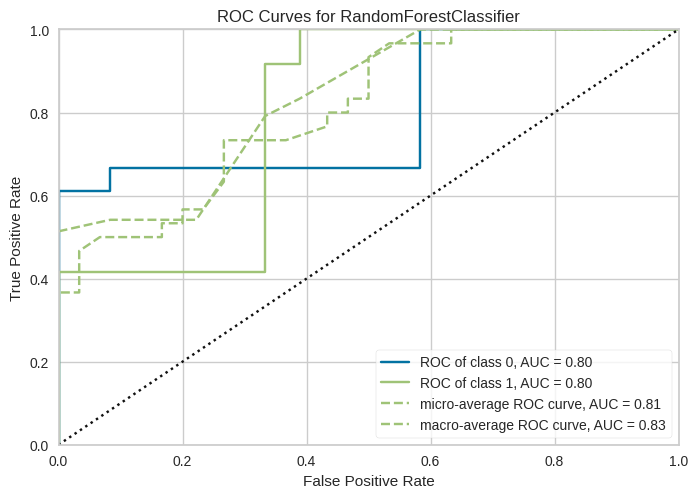

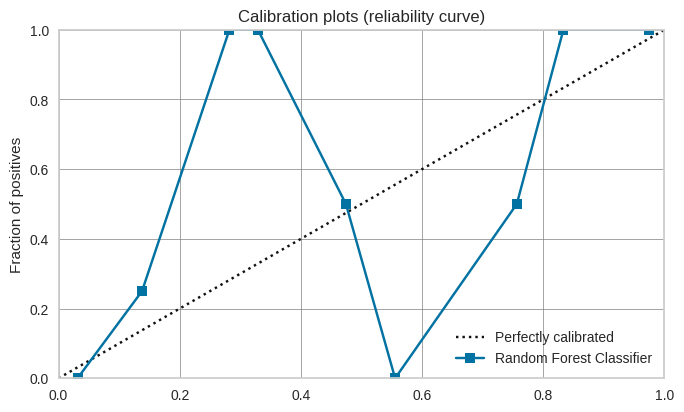

In [12]:
plot_model(clf, plot='auc')
plot_model(clf, plot='calibration')

In [13]:
tuned = tune_model(clf, optimize = 'AUC')
print(tuned)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   31.9s finished


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8148,0.9136,0.5556,0.8333,0.6667,0.5455,0.5669
1,0.8519,0.8457,0.6667,0.8571,0.7500,0.6471,0.6574
2,0.8519,0.9753,0.5556,1.0000,0.7143,0.6250,0.6742
3,0.8148,0.8272,0.7778,0.7000,0.7368,0.5946,0.5966
4,0.8519,0.9671,0.5000,1.0000,0.6667,0.5846,0.6427
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.8889,0.9605,0.7500,0.8571,0.8000,0.7235,0.7266
7,0.7778,0.8750,0.6250,0.6250,0.6250,0.4671,0.4671
8,0.8889,0.9211,0.6250,1.0000,0.7692,0.7011,0.7347
9,0.9231,0.9722,0.8750,0.8750,0.8750,0.8194,0.8194


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=9, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=230,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


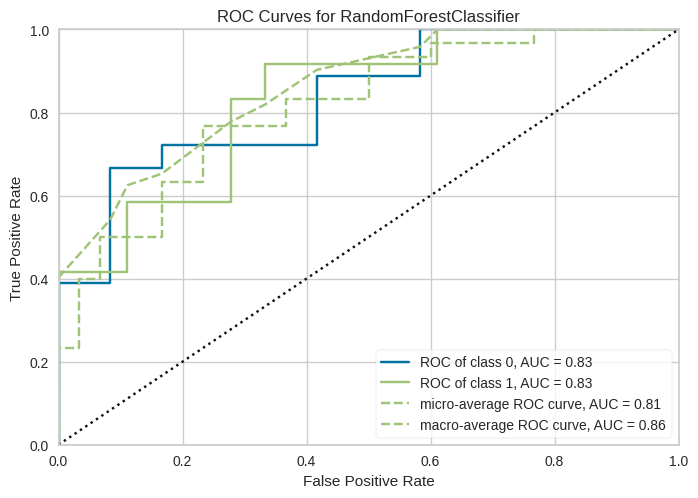

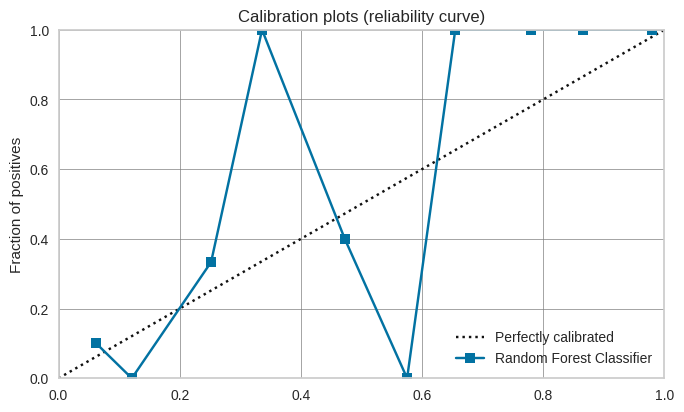

In [14]:
plot_model(tuned, plot='auc')
plot_model(tuned, plot='calibration')

In [15]:
calibrated = calibrate_model(tuned)
print(tuned)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8148,0.9198,0.5556,0.8333,0.6667,0.5455,0.5669
1,0.8148,0.8457,0.6667,0.7500,0.7059,0.5714,0.5735
2,0.8519,0.9630,0.5556,1.0000,0.7143,0.6250,0.6742
3,0.7778,0.8148,0.7778,0.6364,0.7000,0.5263,0.5330
4,0.8519,0.9671,0.6250,0.8333,0.7143,0.6170,0.6287
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9259,0.9737,1.0000,0.8000,0.8889,0.8344,0.8460
7,0.7407,0.8684,0.6250,0.5556,0.5882,0.4000,0.4015
8,0.8889,0.9079,0.7500,0.8571,0.8000,0.7235,0.7266
9,0.9231,0.9722,0.8750,0.8750,0.8750,0.8194,0.8194


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=9, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=230,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


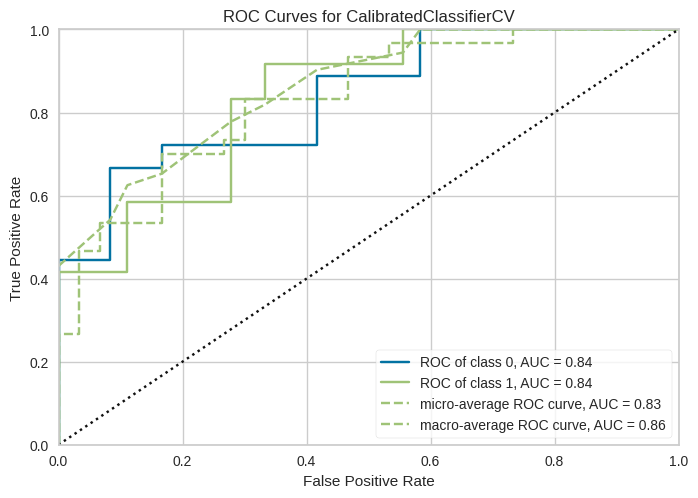

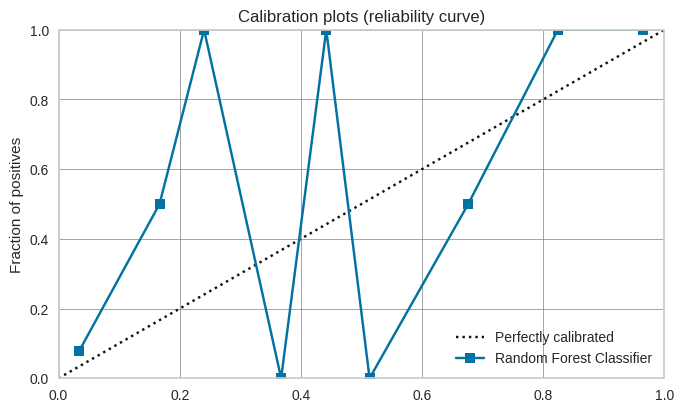

In [16]:
plot_model(calibrated, plot='auc')
plot_model(calibrated, plot='calibration')

In [17]:
plot_model(calibrated, plot='feature')

TypeError: Feature Importance and RFE plots not available for estimators that doesnt support coef_ or feature_importances_ attribute.

In [18]:
predict_model(calibrated)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7333,0.838,0.4167,0.8333,0.5556,0.3939,0.4423


,age,creatinine_phosphokinase,platelets,serum_creatinine,serum_sodium,time,anaemia_1,diabetes_1,ejection_fraction_14,ejection_fraction_15,...,ejection_fraction_62,ejection_fraction_65,ejection_fraction_70,ejection_fraction_80,high_blood_pressure_1,sex_0,smoking_0,DEATH_EVENT,Label,Score
0,70.0,582.0,51000.00000,2.7,136.0,250.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.6321
1,50.0,298.0,362000.00000,0.9,140.0,240.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9379
2,45.0,2442.0,334000.00000,1.1,139.0,129.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0.9091
3,80.0,123.0,388000.00000,9.4,133.0,10.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,0.8315
4,42.0,102.0,237000.00000,1.2,140.0,74.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.8958
5,50.0,1051.0,232000.00000,0.7,136.0,246.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,0.9196
6,60.0,154.0,210000.00000,1.7,135.0,82.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0.5835
7,45.0,292.0,850000.00000,1.3,142.0,88.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9151
8,90.0,47.0,204000.00000,2.1,132.0,8.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,0.8538
9,50.0,115.0,189000.00000,0.8,139.0,146.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.7813


In [19]:
save_model(calibrated, model_name = 'rds_diploma_061220')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='DEATH_EVENT', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric...
                                                                               max_features='sqrt',
                                                                               max_leaf_nodes=None,
                                                                          